In [94]:
from scipy import stats
import numpy as np
import pandas as pd 
import os 
import pandas as pd 
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from scipy.stats import pearsonr
import statsmodels.api as sm
import datetime as dt
from datetime import datetime, time, date
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import time
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, ShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier

In [4]:
df=  pd.read_csv('final_categorical')

In [103]:
df['pct_run'][df['pct_run'] == inf] = 0

/Users/jenniferarty/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
df

,Unnamed: 0,total_time,athlete_categories,athlete_country_id,athlete_yob,coach,current_rankings,higher_education,hobbies,injuries,...,pct_swim,pct_bike,pct_run,pct_trans,age,over_total,over_swim,over_bike,over_run,over_tran
0,0,0.000000,[42],115,2001,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,17,False,False,False,False,False
1,1,57.866667,[42],292,1983,0,0,0,0,0,...,0.288018,0.526210,0.132200,0.053571,35,True,True,True,True,True
2,2,57.866667,[42],292,1983,0,0,0,0,0,...,0.288018,0.526210,0.132200,0.053571,35,False,True,False,False,True
3,3,69.933333,[42],189,2002,0,0,0,0,0,...,0.172784,0.535748,0.262393,0.028837,16,False,False,False,False,False
4,4,54.933333,[42],251,1997,0,0,0,0,0,...,0.194175,0.551881,0.235437,0.017597,21,False,False,False,False,True
5,5,72.550000,[42],189,2002,0,0,0,0,0,...,0.159201,0.546290,0.262118,0.032162,16,False,False,False,False,True
6,6,59.016667,[42],153,1997,0,1,0,0,0,...,0.192601,0.510590,0.273369,0.023440,21,False,True,False,False,True
7,7,75.733333,[42],230,1999,0,0,0,0,0,...,0.092430,0.600792,0.271787,0.034991,19,True,False,False,True,False
8,8,134.350000,[42],188,1967,0,0,0,0,0,...,0.303312,0.477980,0.184841,0.033867,51,False,False,True,False,False
9,9,76.133333,[42],230,1999,0,0,0,0,0,...,0.090630,0.586252,0.285245,0.037872,19,False,False,False,False,True


In [129]:
## categorical regression
X=df[[ 'coach',
       'current_rankings', 'weight', 'finish_percentage', 'race_finishes',
       'race_podium_percentage', 'race_podiums', 'race_starts', 'race_wins', 'event_latitude',
       'event_longitude', 'event_region_id', 'position',
       'prog_id', 'result_id', 'bike_m','swim_m', 'run_m', 't1_s', 't2_s', 'total_tran', 'higher_education_1',
       'occupation_1', 'sponsors_1', 'spouse_children_1', 'athlete_country_id',
       'athlete_categories_[39, 42]', 'athlete_categories_[39]',
       'athlete_categories_[40, 42]', 'athlete_categories_[40]',
       'athlete_categories_[42]', 'athlete_gender_female',
       'athlete_gender_male', 'injuries_0', 'injuries_achilles',
       'injuries_broken_leg', 'injuries_collarbone', 'injuries_face_scar',
       'injuries_knee', 'injuries_stress_fracture','pct_swim','pct_bike','pct_run','pct_trans','age']]


y=df['over_total']
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Logistic Regression

In [130]:
kfold= KFold(n_splits=4)

In [131]:
clf= LogisticRegression()
clf.fit(X_train,y_train)
y_hat_test = clf.predict(X_test)
y_score =clf.decision_function(X_test)
print("Training set score:\n{:.2f}".format(clf.score(X_train,y_train)))
print("Test set score:\n{:.2f}".format(clf.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(clf,X,y, cv=kfold).mean()))

Training set score:
0.66
Test set score:
0.61
Mean cross-validation score:
0.65


In [132]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix( y_hat_test,y_test)

print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[302 194]
 [  1   1]]


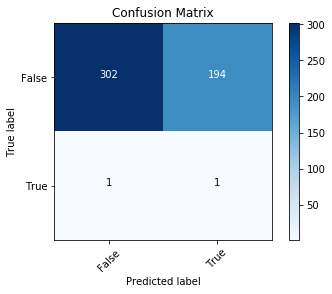

In [133]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

# Random Forest 


In [134]:
rforest= RandomForestClassifier(random_state=0, criterion='gini', max_depth=2,min_samples_leaf=1, min_samples_split=2, n_estimators=30)
rforest.fit(X_train,y_train)
y_hat_test = rforest.predict(X_test)
print("Training set score:\n{:.2f}".format(rforest.score(X_train,y_train)))
print("Test set score:\n{:.2f}".format(rforest.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(rforest,X,y, cv=KFold(n_splits=15, shuffle= True, random_state=0)).mean()))

Training set score:
0.66
Test set score:
0.61
Mean cross-validation score:
0.65


In [135]:
rf_param_grid = {
    'n_estimators': [10, 30, 100,200,250],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [2,5,10,15, 20],
    'min_samples_leaf': [1, 2, 5]
}

rf_grid_search = GridSearchCV(rforest, rf_param_grid, cv=3, return_train_score=True)
rf_grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 30, 100, 200, 250], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 6, 10], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [136]:
rf_gs_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])
rf_gs_testing_score = rf_grid_search.score(X, y)

print("Mean Training Score: {:.4}%".format(rf_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(rf_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Mean Training Score: 75.16%
Mean Testing Score: 64.54%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 10}

Confusion Matrix:
 [[303 195]
 [  0   0]]


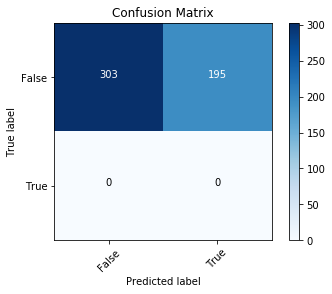

In [137]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_hat_test, y_test)

print('Confusion Matrix:\n',cnf_matrix)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

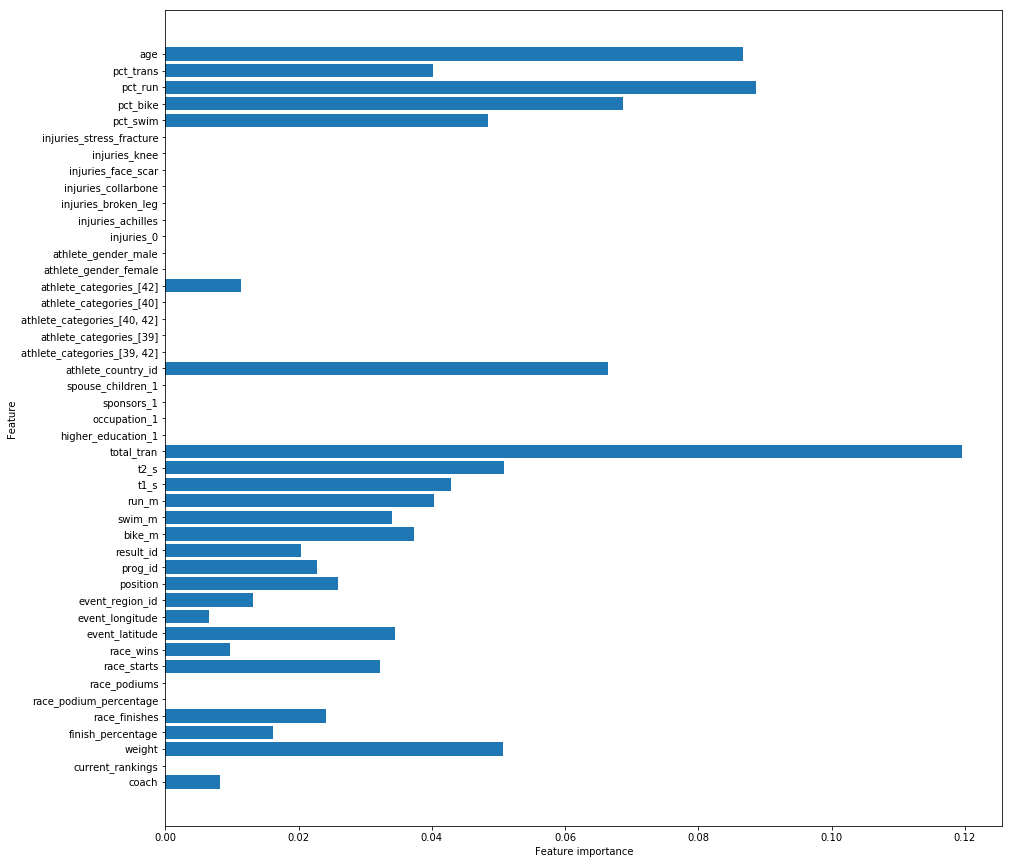

In [138]:
plot_feature_importances(rforest)

# Gradient Boost 


In [115]:
grbst= GradientBoostingClassifier(random_state=0, learning_rate=.001,max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=10)
grbst.fit(X_train,y_train)
y_hat_test = grbst.predict(X_test)
print("Training set score:{:.3f}".format(grbst.score(X_train,y_train)))
print("Test set score:{:.3f}".format(grbst.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(grbst,X,y, cv=kfold).mean()))

Training set score:0.651
Test set score:0.629
Mean cross-validation score:
0.65


In [116]:
#Gradient Boost
gb_param_grid = {'n_estimators': [10,20,30,50],
                  'learning_rate':[0.001, 0.01,0.1,1],
                  'max_depth': [2,4,20],
                  'min_samples_leaf': range(2, 20, 8),
                  'min_samples_split': range(2, 10, 2),
                  #'max_features': range(1, len(X.columns)+1)
                }

In [117]:
gb_grid_search = GridSearchCV(grbst, gb_param_grid, cv=3, return_train_score=True)
gb_grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.001, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 50], 'learning_rate': [0.001, 0.01, 0.1, 1], 'max_depth': [2, 4, 20], 'min_samples_leaf': range(2, 20, 8), 'min_samples_split': range(2, 10, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [118]:
gb_gs_training_score = np.mean(gb_grid_search.cv_results_['mean_train_score'])
gb_gs_testing_score = gb_grid_search.score(X, y)

print("Mean Training Score: {:.4}%".format(gb_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(gb_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
gb_grid_search.best_params_


Mean Training Score: 74.47%
Mean Testing Score: 64.54%
Best Parameter Combination Found During Grid Search:


{'learning_rate': 0.001,
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

Confusion Matrix:
 [[313 185]
 [  0   0]]


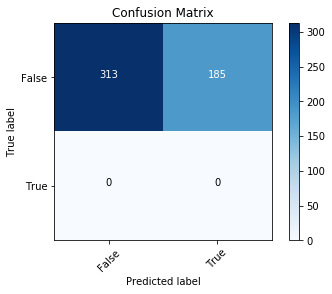

In [119]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)

print('Confusion Matrix:\n',cnf_matrix)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [120]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


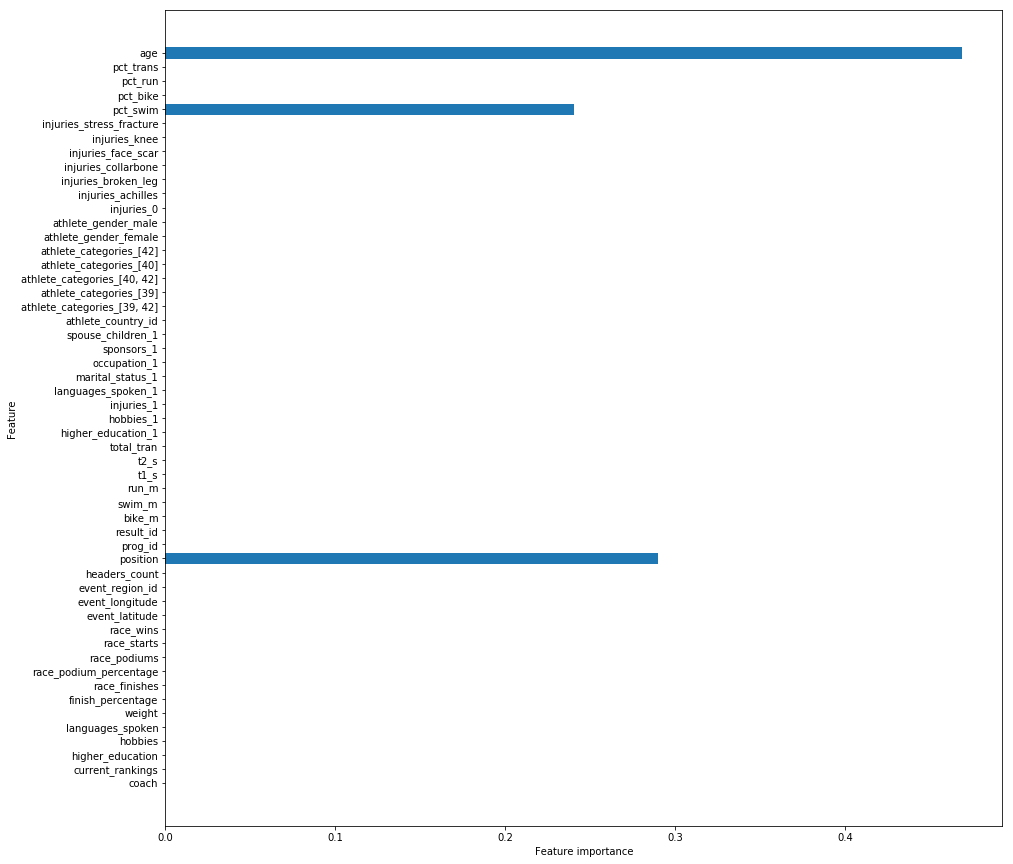

In [121]:
plot_feature_importances(grbst)